<a href="https://colab.research.google.com/github/KaruraM/ANALYSIS/blob/main/ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Problem Statement**

Financial Inclusion remains one of the main obstacles to economic and human development in Africa.Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion making it an essential contributor to long-term economic growth. How we can predict which individuals are most likely to have or use a bank account?

### **Metrics Of  Success**

Get to predict which individuals are most likely to have or use a bank account using EDA.

### **Understanding the Context**

inancial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

### **Experimental Design**

Cleaning up the data and performing EDA.


In [104]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [105]:
# Loading the dataset
df = pd.read_csv("https://bit.ly/FinancialDataset")
df.head(3)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed


In [106]:
# Loading the variable definitions dataset
VarDef = pd.read_csv("https://bit.ly/VariableDefinitions")
VarDef

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [107]:
df.shape # Gives the total no. of entries and columns

(23524, 13)

In [108]:
df.info() # number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [109]:
df.describe()      # Only 3 columns contain numerals, the other 10 contain strings
                   # Gives summary statistics of all the numerical columns excluding NaN values

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [110]:
# Using the IQR to get the number of outliers in each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

year               2.0
household_size     3.0
Respondent Age    23.0
dtype: float64


In [112]:
print(((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum().sort_values(ascending=False))


household_size            377
Respondent Age            241
year                        3
Cell Phone Access           0
Has a Bank account          0
Level of Educuation         0
The relathip with head      0
Type of Job                 0
Type of Location            0
country                     0
gender_of_respondent        0
marital_status              0
uniqueid                    0
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


In [113]:
df.isnull().any() # Returns a Boolean value(True/False) of whether a null value exists in that column or not

country                    True
year                      False
uniqueid                  False
Has a Bank account         True
Type of Location           True
Cell Phone Access          True
household_size             True
Respondent Age             True
gender_of_respondent       True
The relathip with head     True
marital_status             True
Level of Educuation        True
Type of Job                True
dtype: bool

In [114]:
df.isnull().sum() # Returns the total no. of missing values per column

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [115]:
MissingV=df.isnull().sum() # Percentage of missing values
MissingV[MissingV>0]/len(df)*100

country                   0.059514
Has a Bank account        0.153035
Type of Location          0.063765
Cell Phone Access         0.046761
household_size            0.119027
Respondent Age            0.144533
gender_of_respondent      0.144533
The relathip with head    0.017004
marital_status            0.136031
Level of Educuation       0.123278
Type of Job               0.127529
dtype: float64

In [116]:
df.drop(['The relathip with head','marital_status'], axis=1, inplace = True) # These columns have null values that cannot be assumed until another survey is done. 
                                                                   # They have other complimenting columns necessary for the analysis of the data collected

In [117]:
# From the result, all the null values in the 'country' column correspond with the year 2017, the year that the survey was done in Tanzania
# Thus the nulls will be filled with the value 'Tanzania'
df1 = df["country"].fillna('Tanzania', inplace = True)

In [118]:
# From the gathered statistics and surveys, the major group of Tanzanians is self-employed and many of them together with the informally employed, the no income persons  and other employmentlack a bank account thus it is okay to fill all the null values in that column with 'no'
df1 = df["Has a Bank account"].fillna('No', inplace = True)


In [119]:
# From the survey and data collected, majority of the Tanzanians with the highest level of education as Primary School are either self-employed or are in the informal employment category and live in the rural areas.
# majority of those with no formal education also reside in the rural areas
# Moreso, majority of those with tertiary education as their highest level of education have informal employment and reside in the rural areas.
# With all these conclusions it is wise to fill all the nulls in this column with 'Rural'
df1 = df["Type of Location"].fillna('Rural', inplace = True)


In [120]:
df1 = df["Cell Phone Access"].fillna('No', inplace = True) # Most of the people living in the rural areas of Tanzania with no formal education
                                                           # or have primary education as their highest level of education do not have access to a phone according to the survey

In [121]:
Size = pd.isnull(df["household_size"]) # Shows all the null entries in the 'household_size' column
df[Size].head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,Level of Educuation,Type of Job
13279,Rwanda,2016,uniqueid_7212,No,Rural,Yes,NaN,27.0,Female,Primary education,Informally employed
13280,Rwanda,2016,uniqueid_7213,No,Rural,Yes,NaN,78.0,Female,No formal education,Farming and Fishing
13281,Rwanda,2016,uniqueid_7214,No,Rural,Yes,NaN,35.0,Male,No formal education,Informally employed
13282,Rwanda,2016,uniqueid_7215,No,Rural,Yes,NaN,55.0,Male,No formal education,Informally employed
13371,Rwanda,2016,uniqueid_7304,No,Rural,No,NaN,21.0,Female,Primary education,Informally employed


In [122]:
df.mode()['household_size'][0] # Getting the the entry with the highest frequency in the 'household size' column

2.0

In [123]:
df1 = df["household_size"].fillna(2.0, inplace = True) # Replaces the null values in the 'household size' column with the mode

In [124]:
df.mode()['Respondent Age'][0]


30.0

In [125]:
df1 = df["Respondent Age"].fillna(30.0, inplace = True)

In [126]:
df1 = df["gender_of_respondent"].fillna('Female', inplace = True) # Logically majority of the population comprises of the female gender

In [127]:
df1 = df["Level of Educuation"].fillna('None', inplace = True)


In [128]:
df1 = df["Type of Job"].fillna('None', inplace = True)

In [130]:
df.isnull().any()

country                 False
year                    False
uniqueid                False
Has a Bank account      False
Type of Location        False
Cell Phone Access       False
household_size          False
Respondent Age          False
gender_of_respondent    False
Level of Educuation     False
Type of Job             False
dtype: bool

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               23524 non-null  object 
 1   year                  23524 non-null  int64  
 2   uniqueid              23524 non-null  object 
 3   Has a Bank account    23524 non-null  object 
 4   Type of Location      23524 non-null  object 
 5   Cell Phone Access     23524 non-null  object 
 6   household_size        23524 non-null  float64
 7   Respondent Age        23524 non-null  float64
 8   gender_of_respondent  23524 non-null  object 
 9   Level of Educuation   23524 non-null  object 
 10  Type of Job           23524 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 2.0+ MB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


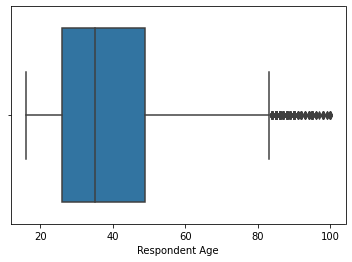

In [132]:
sns.boxplot(df["Respondent Age"]) # Using boxplot to show outliers

In [133]:
Q1 = df['Respondent Age'].quantile(0.25)             # Shows the outliers in age column
Q3 = df['Respondent Age'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
Age_outliers = df[(df['Respondent Age'] < Q1 - whisker_width*IQR) | (df['Respondent Age'] > Q3 + whisker_width*IQR)]
Age_outliers.head(3)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,Level of Educuation,Type of Job
209,Kenya,2018,uniqueid_210,No,Rural,No,3.0,95.0,Female,No formal education,Informally employed
268,Kenya,2018,uniqueid_269,No,Urban,Yes,1.0,85.0,Female,Primary education,Remittance Dependent
340,Kenya,2018,uniqueid_341,No,Rural,No,2.0,95.0,Male,Primary education,Farming and Fishing


In [134]:
Q1 = df['Respondent Age'].quantile(0.25) # Flooring and capping,removing all the values below the 25th percentile or above the 75th percentile
Q3 = df['Respondent Age'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df['Respondent Age']=np.where(df['Respondent Age']>upper_whisker,upper_whisker,np.where(df['Respondent Age']<lower_whisker,lower_whisker,df['Respondent Age']))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


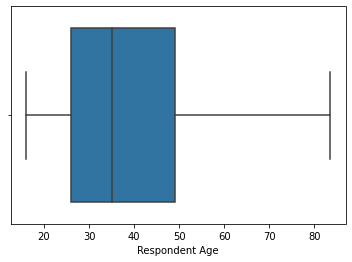

In [135]:
sns.boxplot(df['Respondent Age'],data=df) # No more outliers in the age column

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


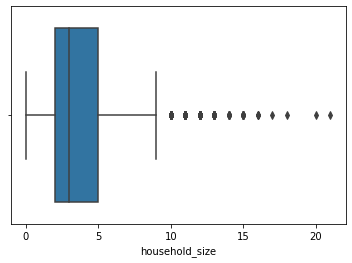

In [136]:
sns.boxplot(df["household_size"]) # Showing outliers


In [137]:
Q1 = df['household_size'].quantile(0.25)             # Shows the outliers in household size column
Q3 = df['household_size'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
HS_outliers = df[(df['household_size'] < Q1 - whisker_width*IQR) | (df['household_size'] > Q3 + whisker_width*IQR)]
HS_outliers.head(3)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,Level of Educuation,Type of Job
34,Kenya,2018,uniqueid_35,No,Rural,Yes,10.0,42.0,Female,Primary education,Farming and Fishing
58,Kenya,2018,uniqueid_59,No,Rural,Yes,11.0,21.0,Male,Other/Dont know/RTA,Informally employed
92,Kenya,2018,uniqueid_93,Yes,Urban,Yes,10.0,21.0,Female,Tertiary education,Remittance Dependent


In [138]:
Q1 = df['household_size'].quantile(0.25) # Flooring and capping,removing all the values below the 25th percentile or above the 75th percentile
Q3 = df['household_size'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df['household_size']=np.where(df['household_size']>upper_whisker,upper_whisker,np.where(df['household_size']<lower_whisker,lower_whisker,df['household_size']))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


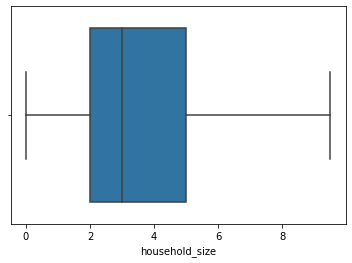

In [139]:
sns.boxplot(df['household_size'],data=df) # No more outliers in the household size column

In [140]:
# Checking for anomalies
df['household_size'].unique()


array([3. , 5. , 8. , 7. , 1. , 6. , 4. , 9.5, 2. , 9. , 0. ])

In [ ]:
df['Respondent Age'].unique()

array([24. , 70. , 26. , 34. , 32. , 42. , 54. , 76. , 40. , 69. , 64. ,
       31. , 38. , 47. , 27. , 48. , 25. , 21. , 18. , 22. , 58. , 55. ,
       62. , 29. , 35. , 45. , 67. , 19. , 80. , 66. , 50. , 33. , 28. ,
       51. , 16. , 17. , 30. , 37. , 59. , 65. , 46. , 56. , 52. , 23. ,
       43. , 49. , 44. , 72. , 53. , 63. , 39. , 81. , 78. , 36. , 20. ,
       60. , 83.5, 71. , 57. , 68. , 41. , 61. , 75. , 73. , 74. , 77. ,
       82. , 79. , 83. ])

### **Exploratory Analysis**

This involves calculating the Mean, Median, Standard Deviation, Kurtosis/skewness & distribution/range.

We'll also use visualizations to better understand our data.



In [141]:
# Measures of central tendency
print(df['Respondent Age'].mean())
print(df['Respondent Age'].mode())
print(df['Respondent Age'].median())

38.738586124808705
0    30.0
dtype: float64
35.0


In [142]:
print(df['household_size'].mean())
print(df['household_size'].mode())
print(df['household_size'].median())

3.6537791191974156
0    2.0
dtype: float64
3.0


In [143]:
# Measures of dispersion for age
print(df['Respondent Age'].std())
print(df['Respondent Age'].var())

print(df['Respondent Age'].skew())
print(df['Respondent Age'].kurt())

16.353470134330745
267.4359854344476
0.7908019823131855
-0.11582371864921415


In [145]:
print(df['household_size'].std())
print(df['household_size'].var())

print(df['household_size'].skew())
print(df['household_size'].kurt())

2.1926557882008977
4.8077394055309
0.7064945517017258
-0.2740478998995717


Since the mean is greater than the mode in both the age and household columns, the distributions are positively skewed.

Skewness value should be within the range of -1 to 1 for a normal distribution, any extreme values from this value indicates the presence of outliers. The removal of outliers scaled it down to a normal distribution.

In [146]:
# Calculating the min and max for the age and household size columns
min_age = df['Respondent Age'].min()
print('minimum age',min_age)
max_age = df['Respondent Age'].max()
print('maximum age',max_age)
#household size
min_size = df['household_size'].min()
print('minimum household',min_size)
max_size = df['household_size'].max()
print('maximum household',max_size)

minimum age 16.0
maximum age 83.5
minimum household 0.0
maximum household 9.5


In [147]:
# Calculating quantiles
quantile_age = df["Respondent Age"].quantile([0.25,0.5,0.75])
print(quantile_age)
quantile_size = df["household_size"].quantile([0.25,0.5,0.75])
print(quantile_size)

0.25    26.0
0.50    35.0
0.75    49.0
Name: Respondent Age, dtype: float64
0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64


In [148]:
df.country.value_counts()

Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: country, dtype: int64

### **Univariate Analysis**

Text(0.5, 1.0, 'Number of participants in each country')

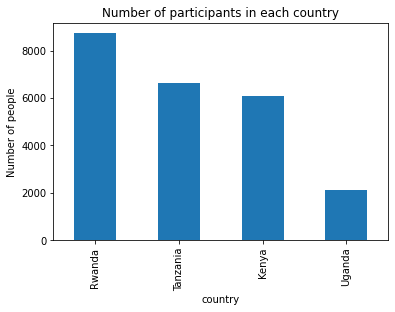

In [149]:
df['country'].value_counts().head().plot.bar()
plt.xlabel("country")
plt.ylabel("Number of people")
plt.title("Number of participants in each country")

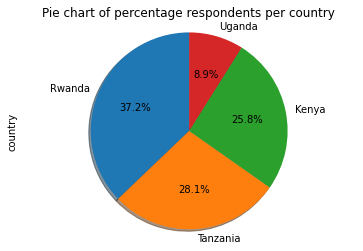

In [ ]:
df.country.value_counts().plot(kind='pie',autopct='%1.1f%%', shadow = True, startangle = 90 )
plt.axis('equal')
plt.title('Pie chart of percentage respondents per country')
plt.show()

Text(0.5, 1.0, 'Country of Respondent Distribution')

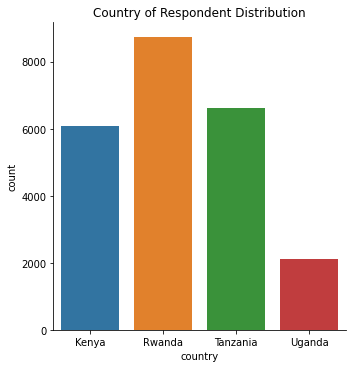

In [ ]:
sns.catplot(x="country", kind="count", data=df)
plt.title("Country of Respondent Distribution")

Majority of the respondents came from Rwanda, followed by Tanzania then Kenya. The willingness of the people to take part in data collection activities has a great impact on this.Uganda had the least number of repondents.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


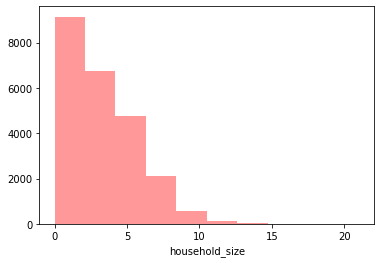

In [ ]:
sns.distplot(df["household_size"],kde=False,color="red",bins=10)

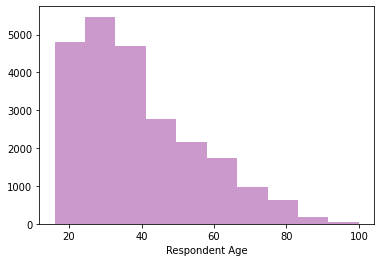

In [ ]:
sns.distplot(df["Respondent Age"],kde=False,color="purple",bins=10)

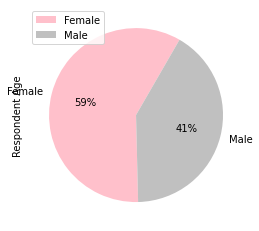

In [ ]:
df.groupby(['gender_of_respondent']).sum().plot(
    kind='pie', y='Respondent Age',colors = ['pink', 'silver', 'steelblue'], autopct='%1.0f%%', startangle=60)

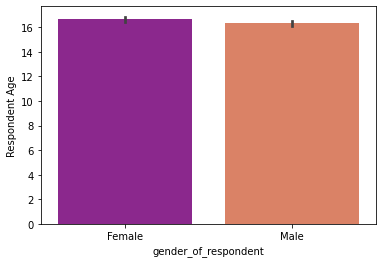

In [ ]:
sns.barplot(x ='gender_of_respondent', y ='Respondent Age', data = df,
            palette ='plasma', estimator = np.std)

Majority of the respondents were female though the male gender had quite a number in the exercise. This is important for variability.

Text(0.5, 1.0, 'Bank Account Distribution')

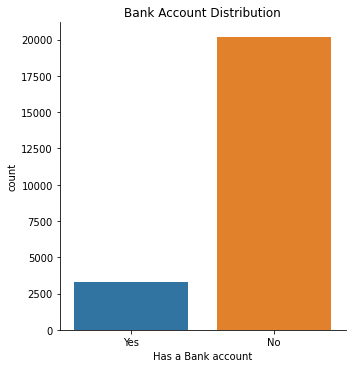

In [ ]:
sns.catplot(x="Has a Bank account", kind="count", data=df)
plt.title("Bank Account Distribution")

Majority of the respondents do not have a bank account and this contributes to the lack of inclusion in many financial services. It is a problem that should be addressed.

Text(0.5, 1.0, 'Location Distribution')

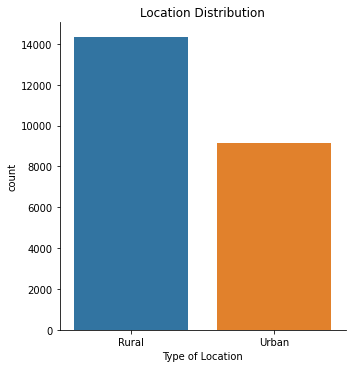

In [ ]:
sns.catplot(x="Type of Location", kind="count", data=df)
plt.title("Location Distribution")

Majority of the population reside in the rural areas majorly because of their level of education as well as they job type. The few that reside in the urban areas are formally employed.

Text(0.5, 1.0, 'Cellphone Acess Distribution')

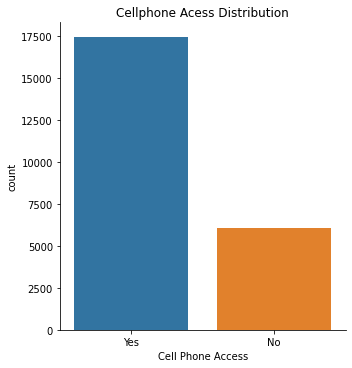

In [ ]:
sns.catplot(x="Cell Phone Access", kind="count", data=df)
plt.title("Cellphone Acess Distribution")

There is no balance as most of the individuals from the survey do not have phone access thus reducing financial inclusion amongst them as this is the fastest way to access financial services.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

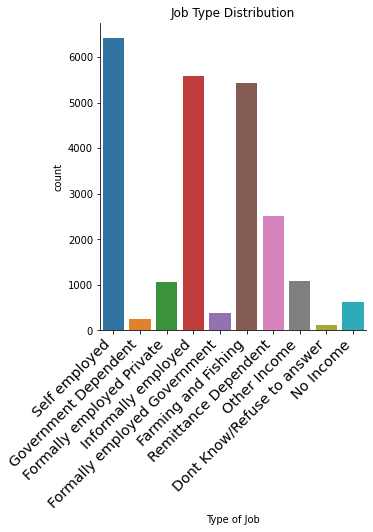

In [ ]:
sns.catplot(x="Type of Job", kind="count", data=df)
plt.title("Job Type Distribution")

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

Most of the individuals are self employed,followed by the informally employed and the farmers/fishermen.
 A few of the population are government dependent.The none represents those who do not know or just refused to answer.

### **Bivariate** **Analysis** 

In [ ]:
# Calculating correlation
correlation_df = df.corr()
correlation_df

,year,household_size,Respondent Age
year,1.000000,-0.049344,-0.019570
household_size,-0.049344,1.000000,-0.119709
Respondent Age,-0.019570,-0.119709,1.000000


This show very weak correlations between these columns

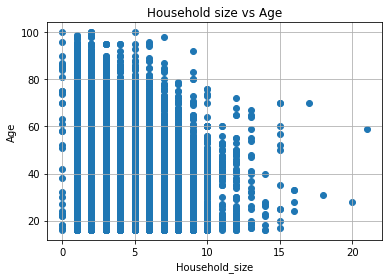

In [ ]:
plt.scatter(df["household_size"] , df["Respondent Age"])
plt.title('Household size vs Age')
plt.xlabel('Household_size')
plt.ylabel('Age')
plt.grid()
plt.show()

### **Multivariate Analysis**

In [ ]:
import scipy.stats as stats

In [150]:
x = df['Has a Bank account']
y = df['household_size']
stats.pointbiserialr(x, y)

TypeError: ignored

In [151]:
x = df['Has a Bank account']
y = df['gender_of_respondent']
stats.pointbiserialr(x, y)

TypeError: ignored

In [152]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

NameError: ignored